Hopfield models can be used to solve *associative memory problem.* Given that a stored pattern (via hebbs rule) is fed to the network initially, the *one-step error probability* is the probability that the network will output a neuron wrongly in the next asyncrhonous update. <br/>

This notebook will run simulation for different sizes of $p$ (amount of stored patterns) while holding the amount of bits $N$ (neurons) constant. The idea is to see the effect on the one-step error probability. For each size of $p$, 100000 independent trials will be run to check the amount of wrong updates and correct. Each independent trial will generate a new set of *p* patterns




# Set up

The cell below will define constants use in the simulation. Random patterns will be generated where each bit in pattern $\textbf{x}_i^{(v)}$ is initialized as


\begin{equation}
\text{Prob}(x_i^{(v)}=\pm 1) = \frac{1}{2}
\end{equation}



In [7]:
import numpy as np
np.random.seed(209)
import pyprind

################# pre-define constants ############################


p_sizes = [12,24,48,70,100,120]

n_independent_trials = 100000

N_neurons = 120



################### Generate the patterns ########################
def create_p_randomPatterns(p):
    p_patterns = []
    for i in range(p):
        pattern = np.asarray(list(map(lambda x: -1 if x==0 else 1, 
                                      np.random.randint(2, size=N_neurons))))
        p_patterns.append(pattern)
    return np.asarray(p_patterns)





An example of the random pattern will be shown here in an 10 by 12 grid. 

<function matplotlib.pyplot.show(*args, **kw)>

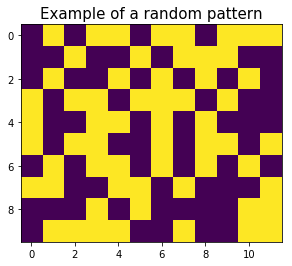

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

pattern = create_p_randomPatterns(12)
plt.title('Example of a random pattern',size=15)
plt.imshow(pattern[0].reshape(10,12))
plt.show

# Hebbs rule

*Hebbs rule* will be used to store the patterns in the network. Each element in the weight matrix will be assigned as follows


\begin{equation}
w_{ij} = \frac{1}{N} \sum_{\mu=1}^{p}x_i^{(\mu)}x_j^{(\mu)} \quad \text{and} \quad \theta_i=0
\end{equation}

- $p$ is refering to the amount of stored patterns and $x_i^{(\mu)}$ is referring to bit $i$ for pattern $\mu$ <br />
- To speed up the experiment, only the neccessary row $i$ will be computed and used to update neuron $i$ 



In [9]:
def generateWeightMatrix(storedPatterns, neuron_i):   
    W = np.zeros(N_neurons)                 
    for j in range(N_neurons):           
        Sum = 0
        if(j==neuron_i):               
            W[j]= 0
        else:
            for u in range(len(storedPatterns)):              
                Sum = Sum + storedPatterns[u][neuron_i]*storedPatterns[u][j]
            W[j] = Sum/N_neurons
    return W
    



# Running the simulation

Let $S_i$ be the state of neuron $i$. A random neuron $i$ will be randomly chosen to be asynchrounsly updated according to the following rule

\begin{equation}
S_i \leftarrow{} \text{sgn} \bigg( \sum_{j} w_{ij} S_j  \bigg) 
\end{equation}


- The left arrow sign means that $S_i$ will be assigned r.h.s of the equation after the update. <br/>

- *alpha* is the storage parameter which is defined as $\alpha = \frac{p}{N}$

Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [#     ] 100% | ETA: 00:49:59

Counter({'Correct update': 99950, 'Error update': 50})
Done  for p=12
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Counter({'Correct update': 98840, 'Error update': 1160})
Done  for p=24
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [###   ] 100% | ETA: 01:06:54

Counter({'Correct update': 94450, 'Error update': 5550})
Done  for p=48
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [####  ] 100% | ETA: 02:25:44

Counter({'Correct update': 90415, 'Error update': 9585})
Done  for p=70
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Counter({'Correct update': 86419, 'Error update': 13581})
Done  for p=100
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [######] 100% | ETA: 00:00:00

Counter({'Correct update': 84328, 'Error update': 15672})
Done  for p=120



Total time elapsed: 07:56:57


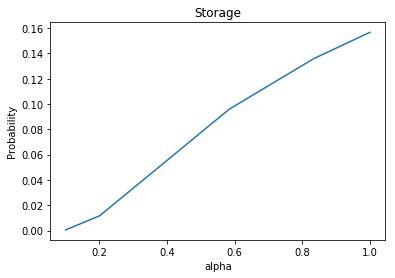

In [10]:
from sklearn.metrics import accuracy_score
import pyprind
from collections import Counter
import time

Results = {}

for p in pyprind.prog_bar(p_sizes): 
    trials = []
    for i in range(n_independent_trials):
        
        storedPatterns = create_p_randomPatterns(p)
        
        selectedPattern = storedPatterns[np.random.choice(np.arange(len(storedPatterns))
                                                          ,1)][0]    
        selectedNeuron = np.random.choice(np.arange(N_neurons), 1)
        Weights_neuron_selected = generateWeightMatrix(storedPatterns, selectedNeuron)
        
        #Perform one update on a randomly selected neuron
        updatedNeuron  = np.sign(np.dot(Weights_neuron_selected,
                                        selectedPattern.T))
        if(updatedNeuron==0):
            updatedNeuron = 1
        if(selectedPattern[selectedNeuron] == updatedNeuron):#Network updated correctly
            trials.append('Correct update')
        if(selectedPattern[selectedNeuron] != updatedNeuron):#didn't update correctly
            trials.append('Error update')
            
        if(i%10000==0):
            print('Done 10000 experiments')
        
        
    Results[str(p)] = trials    
    print(Counter(trials))
    print('Done  for p={0}'.format(p))
    


    
############################# Plotting ###############################
Prob_1_error_for_p_sizes = []          
for result in Results.values():#Store the results in a vector for used for plotting
    counts = Counter(result)
    Prob_1_error_for_p_sizes.append(counts['Error update']/n_independent_trials)
    
    
plt.title('Storage')
plt.plot([x / N_neurons for x in p_sizes],Prob_1_error_for_p_sizes)
plt.xlabel('alpha')
plt.ylabel('Probability')
plt.show()


In [11]:
print(Prob_1_error_for_p_sizes)

[0.0005, 0.0116, 0.0555, 0.09585, 0.13581, 0.15672]


## Re-running the experiment with modified hebbs rule

This simulation will re-run the previous experiment but modifying hebbs rule where the diagonal matrix is not set to zero

In [3]:
def generateWeightMatrix(storedPatterns, neuron_i):  
    W = np.zeros(N_neurons)                 
    #for i in range(np.size(W,0)):               
    for j in range(N_neurons):           
        Sum = 0
        #if(j==neuron_i):               
        #    W[j]= 0
        #else:
        for u in range(len(storedPatterns)):              
            Sum = Sum + storedPatterns[u][neuron_i]*storedPatterns[u][j]
        W[j] = Summation/N_neurons
    return W


Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [#     ] 100% | ETA: 00:47:04

Counter({'Correct update': 99983, 'Error update': 17})
Done  for p=12
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Counter({'Correct update': 99687, 'Error update': 313})
Done  for p=24
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [###   ] 100% | ETA: 01:04:24

Counter({'Correct update': 98750, 'Error update': 1250})
Done  for p=48
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [####  ] 100% | ETA: 00:58:44

Counter({'Correct update': 98156, 'Error update': 1844})
Done  for p=70
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Counter({'Correct update': 97774, 'Error update': 2226})
Done  for p=100
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments
Done 10000 experiments


0% [######] 100% | ETA: 00:00:00

Counter({'Correct update': 97855, 'Error update': 2145})
Done  for p=120



Total time elapsed: 04:43:57


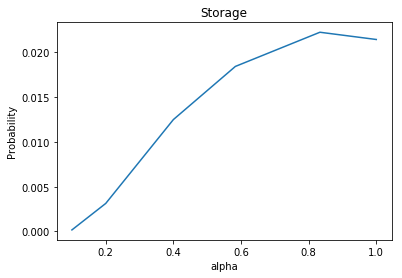

In [4]:
from sklearn.metrics import accuracy_score
import pyprind
from collections import Counter
import time


Results = {}

for p in pyprind.prog_bar(p_sizes): 
    trials = []
    for i in range(n_independent_trials):
        
        storedPatterns = create_p_randomPatterns(p)
        
        selectedPattern = storedPatterns[np.random.choice(np.arange(len(storedPatterns))
                                                          ,1)][0]    
        selectedNeuron = np.random.choice(np.arange(N_neurons), 1)
        Weights_neuron_selected = generateWeightMatrix(storedPatterns, selectedNeuron)
        
        #Perform one update on a randomly selected neuron
        updatedNeuron  = np.sign(np.dot(Weights_neuron_selected,
                                        selectedPattern.T))
        if(updatedNeuron==0):
            updatedNeuron = 1
        if(selectedPattern[selectedNeuron] == updatedNeuron):#network updated correctly
            trials.append('Correct update')
        if(selectedPattern[selectedNeuron] != updatedNeuron):#didn't update correctly
            trials.append('Error update')
            
        if(i%10000==0):
            print('Done 10000 experiments')
        
        
    Results[str(p)] = trials    
    print(Counter(trials))
    print('Done  for p={0}'.format(p))
    


    
############################# Plotting ###############################
Prob_1_error_for_p_sizes = []          
for result in Results.values():#Store the results in a vector for used for plotting
    counts = Counter(result)
    Prob_1_error_for_p_sizes.append(counts['Error update']/n_independent_trials)
    
    
plt.title('Storage')
plt.plot([x / N_neurons for x in p_sizes],Prob_1_error_for_p_sizes)
plt.xlabel('alpha')
plt.ylabel('Probability')
plt.show()


## Conclusions

- If the number of bits (neurons) are constant, increasing the number of stored patterns will increase the one-step error probability

- The modified hebb's (zero diagonal) rule produces diffent results from the standard hebbs rule